## Report 1: Greedy heuristics

* Radosław Winiecki, 148244
* Oskar Szudzik, 148245
* Alicja Kasicka, 148246

Source code: https://github.com/Oskshust/evo_comp/tree/main/1

#### PROBLEM DESCRIPTION:
In our case, a path is a Hamiltonian cycle formed by connecting 50% of the vertices that appear on a plane. The best path is the one for which the cost of taking it is the lowest.   

The aim of the problem is to compare the paths created by two greedy heuristics that differ in the way they choose the next vertex to be added- nearest neighbor and greedy cycle and a random solution. We run each greedy method 200 times- each time we chose the different vertex as the starting node. For the random method, the starting vertex is chosen randomly in every iteration.

In [1]:
from scripts import *

print(get_dist_matrix("../data/TSPA.csv", True))

[[  inf 2032. 2098. ... 4159. 3783. 1514.]
 [1633.   inf 2398. ... 3349. 2266.  817.]
 [ 720. 1419.   inf ... 3640. 3149.  964.]
 ...
 [2782. 2371. 3641. ...   inf 2908. 2554.]
 [2558. 1440. 3302. ... 3060.   inf 1773.]
 [1234.  936. 2062. ... 3651. 2718.   inf]]


In [2]:
matrix = get_dist_matrix("../data/TSPA.csv", True)
sol, cost = random_solution(matrix)
print(sol, cost)

[ 11  27 175   5  93 130  26 176   9  99 169  73 164  84  40  53  86 197
  89 141 161  59  55  20 116  36 158 144  39 181  21  34 117 140 151 183
 108  46 154 134 190  85 149 185  13  65  28 178  72 111  76  14  70   1
  66  68  15  10  94  38 105 128  25 180 129 156  61  12 123  49  80  33
  52 152 147  75 119  42 186 114 166 199  54 153   6  35 146 124  48 143
 120 113 101  16  98   8  62 193  43 159] 251996.0


## RANDOM SOLUTION

#### PSEUDOCODE:

    function random_solution(dist_matrix, all_vertices):
        n <- round_up(number_of_all_vertices / 2)
        solution = []

        for i in range(n):
            random_vertex <- get_random(all_vertices)
            solution.append(random_vertex)
            all_vertices.remove(random_vertex)
        
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

In [3]:
np.random.seed(123)

In [ ]:
run_random_exp("../data/TSPA.csv")

In [ ]:
run_random_exp("../data/TSPB.csv")

In [ ]:
run_random_exp("../data/TSPC.csv")

In [ ]:
run_random_exp("../data/TSPD.csv")

## NEAREST NEIGHBOUR

#### PSEUDOCODE:

    function nearest_neighbour_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)

        temp_matrix = dist_matrix.copy()
        solution = [starting_vertex]
        current_vertex = starting_vertex
        for i in range(n-1):
            nearest_neighbour = argmin(temp_matrix[current_vertex])
    
            for i in range(temp_matrix.size):
                dist_matrix[i, current] = inf 
            for i in range(temp_matrix[current].size):
                dist_matrix[current, i] = inf
    
            current_vertex = nearest_neighbour
            solution.append(current_vertex)
    
        cost = 0
        for i in range(n):
            cost += dist_matrix[solution[i-1], solution[i]]
            

In [ ]:
run_nn_exp("../data/TSPA.csv")

In [ ]:
run_nn_exp("../data/TSPB.csv")

In [ ]:
run_nn_exp("../data/TSPC.csv")

In [ ]:
run_nn_exp("../data/TSPD.csv")

## GREEEDY CYCLE

#### PSEUDOCODE:

    function greedy_solution(dist_matrix, starting_vertex):  
    
        n <- round_up(number_of_all_vertices / 2)
        next_vertex <- argmin(dist_matrix[starting_vertex])

        temp_matrix = dist_matrix.copy()
        cycle = [starting_vertex, next_vertex]
        cost <- calculate_cost(cycle, dist_matrix)

        for _ in range(n-2):
            best_new_cost = inf
            best_new_cycle = cycle
    
            for i, v in enumerate(cycle):
            new_v = np.argmin(matrix[v])
            new_cycle = cycle[:i] + [new_v] + cycle[i:]            
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            new_cycle = cycle[:i+1] + [new_v] + cycle[i+1:]       
            new_cost = calculate_cost(new_cycle, matrix_src)

            if new_cost < best_new_cost:
                best_new_cycle = new_cycle
                best_new_cost = new_cost
                chosen_v = new_v

            cycle = best_new_cycle
            cost = best_new_cost
            matrix[chosen_v, :] = np.inf
            matrix[:, chosen_v] = np.inf

        return cycle, cost
            

([0, 19], inf)
Best cost: inf
Worst cost: inf
Mean cost after 200 solutions: inf


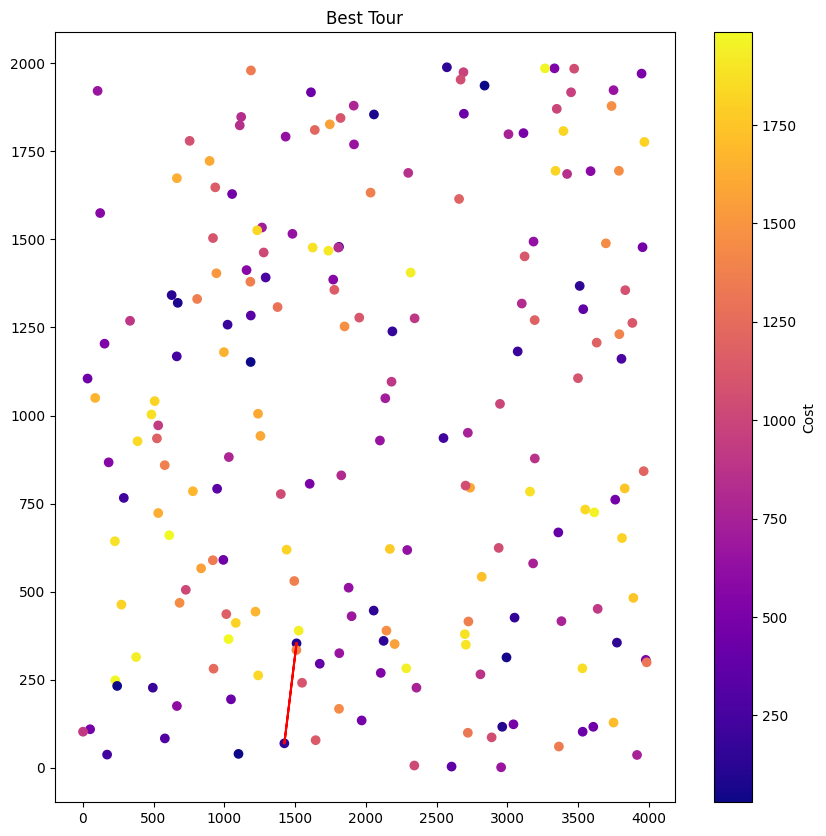

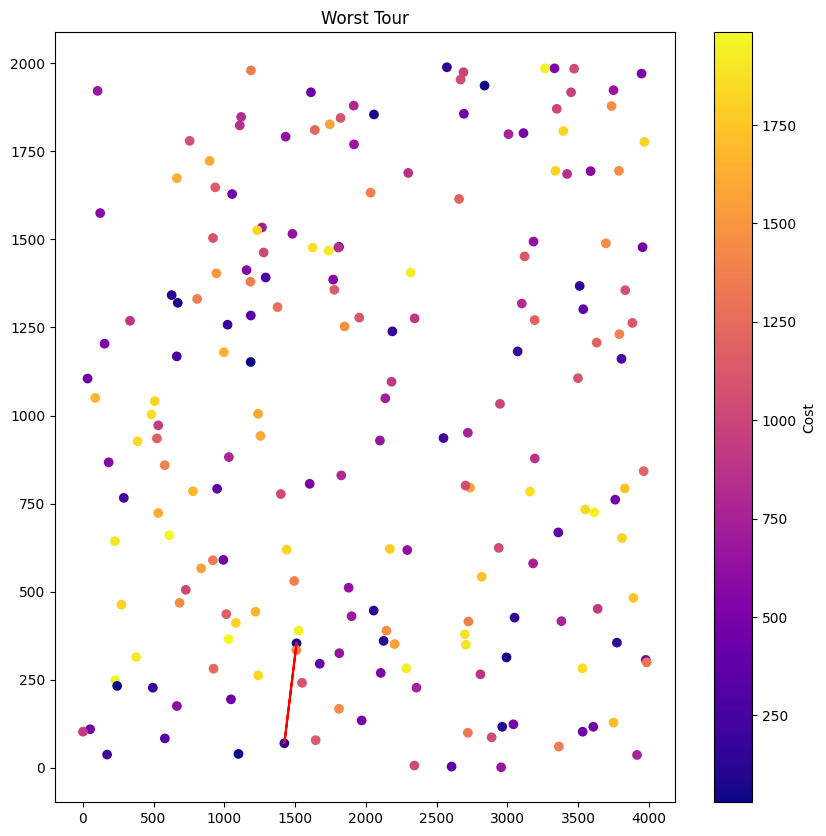

In [4]:
run_greedy_experiment("../data/TSPA.csv")

## CONCLUSIONS:

### Results:

| Experiment | Algorithm  | MIN   | MAX   | AVG over 200   |
|-----------|----------|----------|----------|----------|
| TSPA    | RANDOM | 241153 | 298242 | 264750.185 |
| TSPA    | NEAREST_N  | 110035 | 125805 | 116516.55 |
| TSPA    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPB    | RANDOM | 240380 | 296499 | 266304.945 |
| TSPB    | NEAREST_N  | 109047 | 124759 | 116413.93 |
| TSPB    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPC    | RANDOM | 188548 | 239747 | 214950.675 |
| TSPC    | NEAREST_N  | 62629 | 71814 | 66329.945 |
| TSPC    | G_CYCLE  | min | max | avg |
|-----------|----------|----------|----------|----------|
| TSPD    | RANDOM  | 194917 | 246170 | 218555.1 |
| TSPD    | NEAREST_N  | 62967 | 71396 | 67119.2 |
| TSPD    | G_CYCLE  | min | max | avg |



1. Switching from random solution to nearest neighbour already gives us much better performance.
2. 
3.
